<a href="https://colab.research.google.com/github/aromanenko/ATSF/blob/wip/1_IntroTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HSE, Applied Time Series Forecasitng , Fall 2023

<font color="blue"> Lesson #1: Time Series Forecasting Problems Overview</font>

<span style="color:black; font-size: 12pt"></span>

Alexey Romanenko,
<font color="blue">alexromsput@gmail.com</font>



**Key words:**
    - time series foreasting problem, forecast horizon, naive forecast

**Your feedback:**  please provide you feedback  <a href="https://forms.gle/EQgXEVQe9PPXUBzm6"> here </a>

In [29]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from IPython.display import Image

# from google.colab import files
# uploaded = files.upload()
# import matplotlib.pyplot as plt
# %matplotlib inline

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
pd.options.plotting.backend = "plotly"

import warnings
warnings.filterwarnings('ignore')


# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# from sklearn import model_selection
import scipy as sc

# Intro
## About myself
* Graduated MIPT at 2011
* 10+ years in Education service
* 12+ years of Analytics Implementation for big companies
* 12+ different clients  

## Course Overview
 * 13 lessons
 * 3 HW (3 points, 3 points, 4 points)
 * Learn how to use ESM(ETS), ARIMA, ML-based, DeepLearning algorithms for time series forecasting problems
 * Working with time series from 5 different industries (Retail, Finance, Manufacturing, Energy Market, Nature)
 * Tools: Python Colab/Local (ex. miniconda)


# Time Series Overview

### TS in Retail

In [5]:
rt_df = pd.read_csv('https://raw.githubusercontent.com/aromanenko/ATSF/main/data/retail_2products.csv', sep = ';',parse_dates=['Date']).set_index('Date')
rt_df.head()

,Store_id,SKU_id,Promo,Demand,Regular_Price,Promo_Price
Date,,,,,,
2015-01-01,1,1,NaN,22.0,163.78,NaN
2015-01-02,1,1,NaN,41.0,163.78,NaN
2015-01-03,1,1,NaN,35.0,163.78,NaN
2015-01-04,1,1,NaN,72.0,163.78,NaN
2015-01-05,1,1,NaN,25.0,163.78,NaN


In [10]:
rt_df[(rt_df['Store_id']==1) & (rt_df['SKU_id']==1)]['Demand'].plot().update_layout(height=350, width=1300).show()

In [11]:
rt_df.groupby(['Store_id', 'SKU_id']).count()

Promo  Demand  Regular_Price  Promo_Price
Store_id SKU_id                                           
1        1         121     508            536          121
         2          69     508            536           69
2        1         121     508            536          121
         2          69     508            536           69
3        1         120     508            536          120
...                ...     ...            ...          ...
108      2           0       0              3            0
109      1           6       0             10            6
         2           4       0             10            4
110      1           6       0             10            6
         2           4       0             10            4

[220 rows x 4 columns]

In [16]:
# how many ts are there?
rt_df.groupby(['Store_id', 'SKU_id']).count().shape
# rt_df.reset_index().set_index(['Date', 'Store_id', 'SKU_id'])[['Demand']].unstack(['Store_id', 'SKU_id']).plot(figsize = (25,5))

(220, 4)

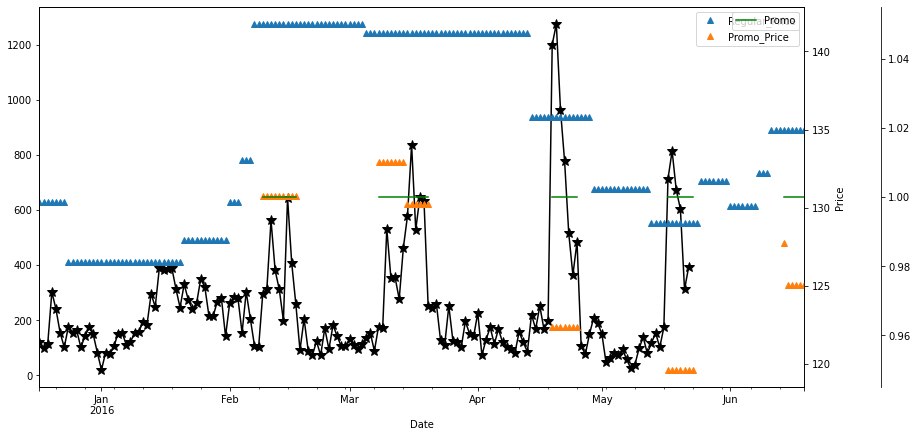

In [ ]:
# Driver analysis
fig, ax = plt.subplots(figsize=(25,7))

ax2, ax3 = ax.twinx(), ax.twinx()
ax2.set_ylabel('Price')
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.1))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.55)

rt_df[(rt_df['Store_id']==1) & (rt_df['SKU_id']==1)]['Demand'].tail(186).plot(ax = ax,  style='k-', marker = '*', markersize = 10.0)
rt_df[(rt_df['Store_id']==1) & (rt_df['SKU_id']==1)][['Regular_Price', 'Promo_Price']].tail(186).plot(ax = ax2, marker = '^', linewidth=0.0)
rt_df[(rt_df['Store_id']==1) & (rt_df['SKU_id']==1)][['Promo']].tail(186).plot(ax = ax3,  style='g-')

lines = ax.get_lines() + ax3.get_lines() + ax2.get_lines()
# ax.legend(lines, [l.get_label() for l in lines], loc='lower left')

Questions

- Define key aspects of the retail time series
  - answer

### TS in Finance


In [17]:
# DJ data https://query.data.world/s/5wc4pg4jsopcqdvwn2l6o7iefmn4du
# Nadaq data https://query.data.world/s/7i4qprw6j7mauc2fb2ge7pzxlmbeos

dj_df = pd.read_csv('https://query.data.world/s/5wc4pg4jsopcqdvwn2l6o7iefmn4du', parse_dates=['Date']).set_index('Date')
dj_df.head()

,Value
Date,
1977-09-02,872.31
1977-09-09,857.04
1977-09-16,856.81
1977-09-23,839.14
1977-09-30,847.11


In [18]:
dj_df.plot().update_layout(height=350, width=1300).show()

In [19]:
# last 5 years
dj_df.tail(265).plot().update_layout(height=350, width=1300).show()

In [20]:
# since 2015 year
dj_df['2013-01-01':].plot().update_layout(height=350, width=1300).show()

Answer questions
 - Define key aspects of the retail time series



### TS in Energy Market

In [21]:
# ts = pd.read_csv('consumption_train.csv', sep='\t', decimal=',')
en_df = pd.read_csv('https://raw.githubusercontent.com/aromanenko/ATSF/33b78c9be63831567f8036ad40c5859e824d30f7/data/energy_consump.csv', decimal='.', parse_dates=['Date'], dayfirst=False, index_col='Date')
en_df.tail(10)

,Hub,ZSP,EnergyConsump,Temp1,Temp2,Temp3,Temp4,Temp5,Temp6,Temp7,Saturday,Sunday,Temp1_South_Less,Temp2_South_Less,Temp3_South_Less,Temp4_South_Less,Temp1_South_Gr,Temp2_South_Gr,Temp3_South_Gr,Temp4_South_Gr
Date,,,,,,,,,,,,,,,,,,,,
2015-05-18,Center,FZSZOE27,NaN,7.7,7.5,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-19,Center,FZSZOE27,NaN,8.5,8.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-20,Center,FZSZOE27,NaN,9.9,7.9,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-21,Center,FZSZOE27,NaN,12.0,10.4,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-22,Center,FZSZOE27,NaN,11.0,11.6,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-23,Center,FZSZOE27,NaN,11.7,11.9,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-24,Center,FZSZOE27,NaN,12.4,12.8,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-25,Center,FZSZOE27,NaN,16.2,15.4,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-26,Center,FZSZOE27,NaN,18.7,17.3,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Plot time series
en_df['EnergyConsump'].plot().update_layout(height=350, width=1300).show() # for matplotlotlib: en_df['EnergyConsump'].plot(figsize=(25,7))

In [24]:
# last 1.5 years of data
en_df.loc['2014-01-01':'2016-01-01', 'EnergyConsump'].plot().update_layout(height=350, width=1300).show()

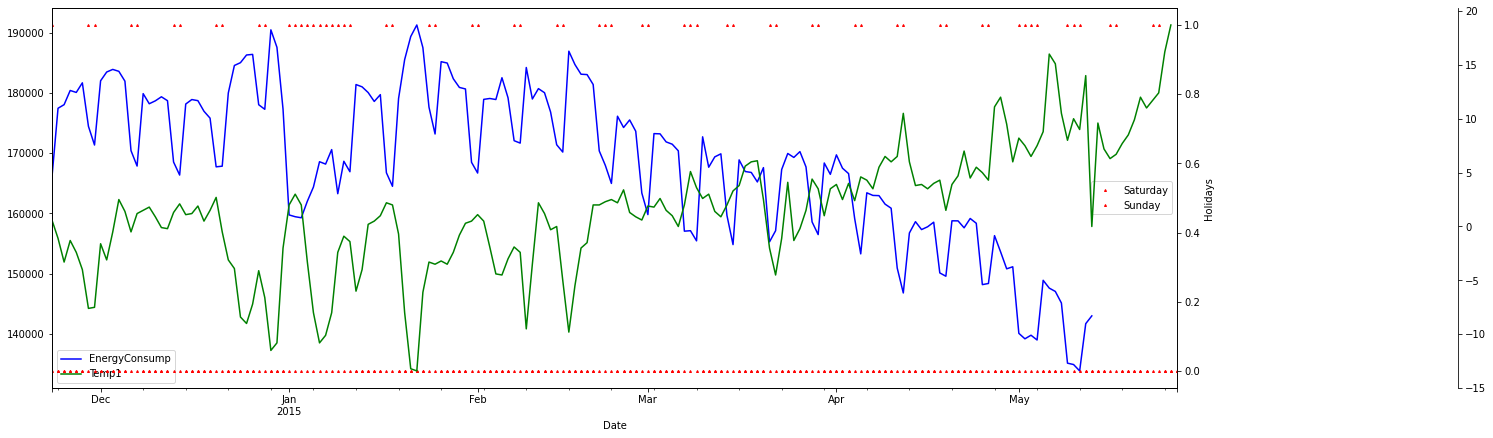

In [ ]:
# Driver analysis
fig, ax = plt.subplots(figsize=(25,7))

ax2, ax3 = ax.twinx(), ax.twinx()
ax2.set_ylabel('Holidays')
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.25))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.75)

en_df['EnergyConsump'].tail(186).plot(ax = ax,  style='b-')
en_df[['Saturday', 'Sunday']].tail(186).plot(ax = ax2, style='r', marker = '^', markersize = 2.0, linewidth=0.0)
en_df['Temp1'].tail(186).plot(ax = ax3,  style='g-')

lines = ax.get_lines() + ax3.get_lines() #  ax2.get_lines()
ax.legend(lines, [l.get_label() for l in lines], loc='lower left')
# uncomment to save the figure
# plt.savefig('../Lecture_TS_Forecasting/pic/Energy_WeekSeasonality.png', bbox_inches='tight', pad_inches=0) #
# plt.savefig('../Lecture_TS_Forecasting/pic/Energy_WeekSeasonality.eps', bbox_inches='tight', pad_inches=0, format='eps', dpi=1000)

## TS in Manufacturing
<img src="https://www.nicepng.com/png/full/406-4065509_almacen-warehouse-zones.png" alt="Drawing" width = '500px'/>

Problem: There are a lot of different operations in warehouse (inbound processing, moving, picking, packing,  outbound processing).

Total amount of inbound/picking&packing/outbound volumes is known.

Estimate effort $W$ (workload) needed to process all volumes.

$$W_t = N_{t}^1 \cdot p^1_{t} + \dots + N_{t}^K \cdot p^{K}_t $$

where:
  * $p^{j}_t - $ is an productivity of workers for task $j$ at day $t$.
  * $N^{j}_t - $ is a workload on task $j$ at day $t$

In [25]:
ww_df = pd.read_csv('https://raw.githubusercontent.com/aromanenko/ATSF/main/data/ww_statistics.csv', decimal='.', parse_dates=['day'], dayfirst=False, index_col='day')
ww_df.tail(10)

,GSM pcs,Accessories pcs,DECT pcs,Battery pcs,Photo pcs,Offline stores,Online Orders,New Stores,Accessories lines,Total lines,Cards pcs,SIM pcs,main manhours,cargo manhours,students manhours,total manhours
day,,,,,,,,,,,,,,,,
2012-10-23,33497.0,61938.0,7799.0,NaN,14819.0,1026.0,1318.0,1.165863,49797.0,101258.0,18221.0,17902.0,855.000000,0.0,608.000000,1250.200000
2012-10-24,32615.0,71476.0,8814.0,NaN,14526.0,996.0,1351.0,1.157054,59848.0,110134.0,21050.0,13850.0,848.750000,0.0,586.250000,1229.812500
2012-10-25,27730.0,64317.0,7113.0,NaN,12833.0,930.0,1198.0,1.110733,56738.0,100828.0,32626.0,6830.0,760.000000,0.0,568.000000,1129.200000
2012-10-26,22354.0,68496.0,5470.0,NaN,10315.0,981.0,966.0,1.098673,60016.0,97058.0,105690.0,7525.0,690.000000,0.0,536.666667,1038.833333
2012-10-27,26738.0,68550.0,6766.0,NaN,12486.0,1067.0,1658.0,1.111877,58439.0,103015.0,22888.0,19797.0,805.000000,0.0,612.500000,1203.125000
2012-10-28,26004.0,61182.0,4869.0,NaN,13143.0,1120.0,1463.0,1.148024,51682.0,91634.0,27433.0,9202.0,708.333333,0.0,550.000000,1065.833333
2012-10-29,28592.0,71805.0,7078.0,NaN,15859.0,1095.0,1423.0,1.224098,55450.0,100755.0,24427.0,2067.0,822.500000,0.0,560.000000,1186.500000
2012-10-30,24185.0,63759.0,7949.0,NaN,13645.0,1021.0,1313.0,1.174418,50826.0,93270.0,10183.0,15020.0,751.750000,0.0,558.000000,1114.450000
2012-10-31,24776.0,73836.0,8740.0,NaN,15734.0,995.0,1404.0,1.151865,61329.0,106858.0,11030.0,12509.0,841.500000,0.0,637.500000,1255.875000


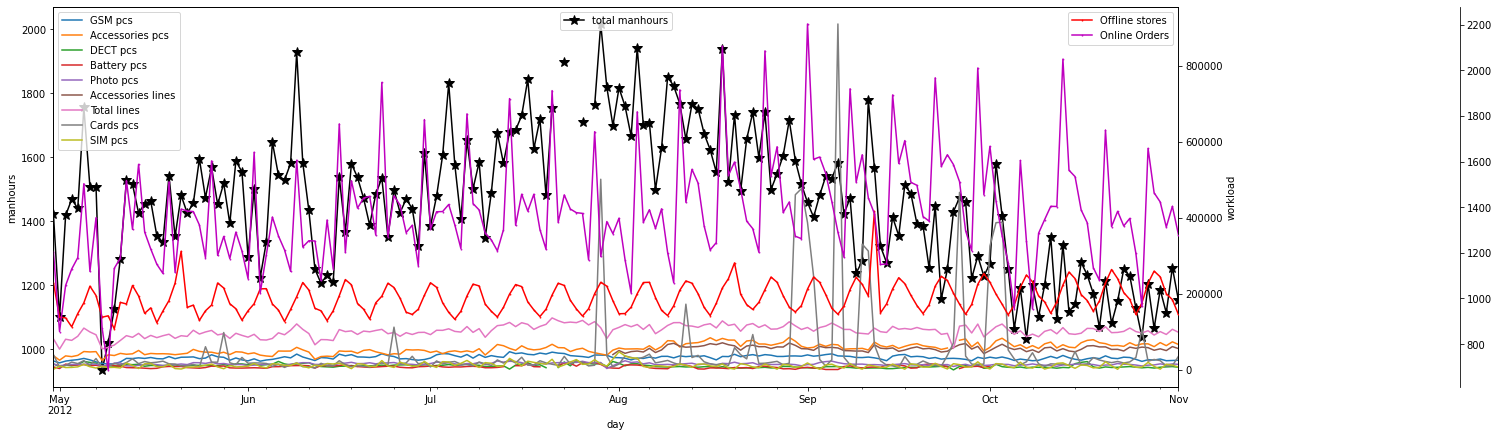

In [ ]:
# Driver analysis
fig, ax = plt.subplots(figsize=(25,7))

ax.set_ylabel('manhours')

ax2, ax3 = ax.twinx(), ax.twinx()
ax2.set_ylabel('workload')
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.25))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.75)

ww_df['total manhours'].tail(186).plot(ax = ax,  style='k-', marker = '*', markersize = 10.0)
ww_df[list(ww_df.columns[:5])+list(ww_df.columns[8:12])].tail(186).plot(ax = ax2)
ww_df[ww_df.columns[5:7]].tail(186).plot(ax = ax3, style=['r', 'm'], marker = '^', markersize = 1.0)
ax.legend(loc = 'upper center')
ax2.legend(loc = 'upper left')

# lines = ax.get_lines() + ax3.get_lines() +  ax2.get_lines()
# ax.legend(lines, [l.get_label() for l in lines], loc='out')

**Questions**
 * How to take into account:
  * permanent changing productivity ($p_{j}$ are changing permenantely)
  * productivity is changing *slowly* from day to day ($p^j_t$ and $p^j_{t-1}$ are quite close to each other)

Task exmples:
 <a href = http://www.machinelearning.ru/wiki/images/archive/c/cb/20160412121749!voron-ml-forecasting-slides.pdf > LAWR algorithm </a> is used to train this regression model



$$
\begin{cases}
    \sum_{\tau}^{t-1} \color{red}\beta^{t-\tau}\left(\cdot\sum_{j=1}^K p^j\cdot N_{\tau}^j - W_\tau\right)^2+\color{red}\lambda \sum_{j=1}^K\left(p^j-p^j_{t-1}\right)^2 \rightarrow \min_{p^1, \dots, p^K}
    \\
    p^j \geq0     
\end{cases}
$$

where
 * $\beta  \in (0,1) - $ параметр забывания истории
 * $\lambda\in(0, +\infty) - $ regularization parameter (веса должны плавно затухать)

## TS in Nature

In [26]:
ss_df = pd.read_csv('https://raw.githubusercontent.com/aromanenko/ATSF/main/data/Sunspots.csv', decimal='.', parse_dates=['Date'], dayfirst=False, index_col='Date')
ss_df = ss_df[[ss_df.columns[1]]]
ss_df.tail(10)

,Monthly Mean Total Sunspot Number
Date,
2020-04-30,5.2
2020-05-31,0.2
2020-06-30,5.8
2020-07-31,6.1
2020-08-31,7.5
2020-09-30,0.6
2020-10-31,14.4
2020-11-30,34.0
2020-12-31,21.8


In [27]:
ss_df.plot().update_layout(height=350, width=1300).show()

# Time Series Forecasting Problem

## Basic terms


<img src="https://github.com/aromanenko/ATSF/blob/main/pic/definitions.png?raw=true" alt="Drawing" width = '1000px'/>

<font color = 'green'>Def0.</font> The <font color='red'>time series</font>  is a series of data points taken at successive equally spaced points in time indexed in time order.

<font color = 'green'>Def1.</font> The <font color='red'>forecast period</font> is the period of time into the future for which forecasts are to be prepared.The forecast period usually is started just after the moment when the last actual value is known (<font color='red'>the end of time series</font>) and inlcudes several timestamps.
<!--
<img src="https://github.com/aromanenko/ATSF/blob/328e49b8f00185b9a2de2e24fe148130ef53f849/pic/definitions.png" alt="Drawing" style="width: 100px;"/>

![picture](https://github.com/aromanenko/ATSF/blob/328e49b8f00185b9a2de2e24fe148130ef53f849/pic/definitions.png) -->

<font color = 'green'>Def2.</font> Let we a given a particular timestamp $t$ of the forecast period. The <font color='red'>forecast delay</font> describes how far $t$ is located from the end of time series.

<font color = 'green'>Def3.</font> The <font color='red'>forecast horizon</font> is length of the forecast period . The forecast horizon is measured in timestamps (forcast horizon is 52).
In business communications the forecast horizon usually is descibed in time intervals (2 years, 24 months,  104 weeks).

These generally vary from short-term forecasting horizons (less than three months) to long-term horizons (more than two years).


**Questions**
  * What is the difference between forecast delay and forecast horizon?

  * You are asked to build forecast on a monthly basis (one forecast release per month) but in weekly granularity (timestamps of a time series refers to a week). The business needs to build a forecast for the next 24 months. What should be the forecast horizon in timestamps?

## Hidden components of a time series
**Usually the following components are distinguished**
  - level --- attitude  of a time series ar a moment $t$ (usually is equal to original value)
  - trend - speed of incremental increase/descrease of level compnent
  - seasonality - cyclic component of a time series
  - noise (errors) - random component of a time series

In [35]:
ech_df = pd.read_csv('https://raw.githubusercontent.com/aromanenko/ATSF/main/data/energy_consumption_hours.csv', sep=',', parse_dates=['Date'], dayfirst=False, index_col='Date')
ech_df.tail(10)

,EnergyCons,Dev,WeekDay
Date,,,
2007-12-31 14:00:00,1976,-13,1
2007-12-31 15:00:00,1968,-14,1
2007-12-31 16:00:00,1914,-14,1
2007-12-31 17:00:00,1859,-13,1
2007-12-31 18:00:00,1830,-13,1
2007-12-31 19:00:00,1719,-13,1
2007-12-31 20:00:00,1621,-12,1
2007-12-31 21:00:00,1516,-12,1
2007-12-31 22:00:00,1459,-11,1


In [39]:
#  original time granularity
ech_df['EnergyCons']['2005-02-01 00:00':'2005-07-01 23:00'].plot().update_layout(height=350, width=1350)

In [40]:
 #  daily time granularity
 ech_df['EnergyCons']['2005-02-01 00:00':'2005-07-01 23:00'].resample("D").sum().plot().update_layout(height=350, width=1350)

In [44]:
#  weely time granularity
ech_df['EnergyCons'].resample("W").sum().plot().update_layout(height=350, width=1350)

In [43]:
 #  monthly time granularity
 ech_df['EnergyCons'].resample("M").sum().plot().update_layout(height=350, width=1350)

## STL decomposition
For details see here https://www.statsmodels.org/stable/examples/notebooks/generated/stl_decomposition.html

In [46]:
import statsmodels.api as sm

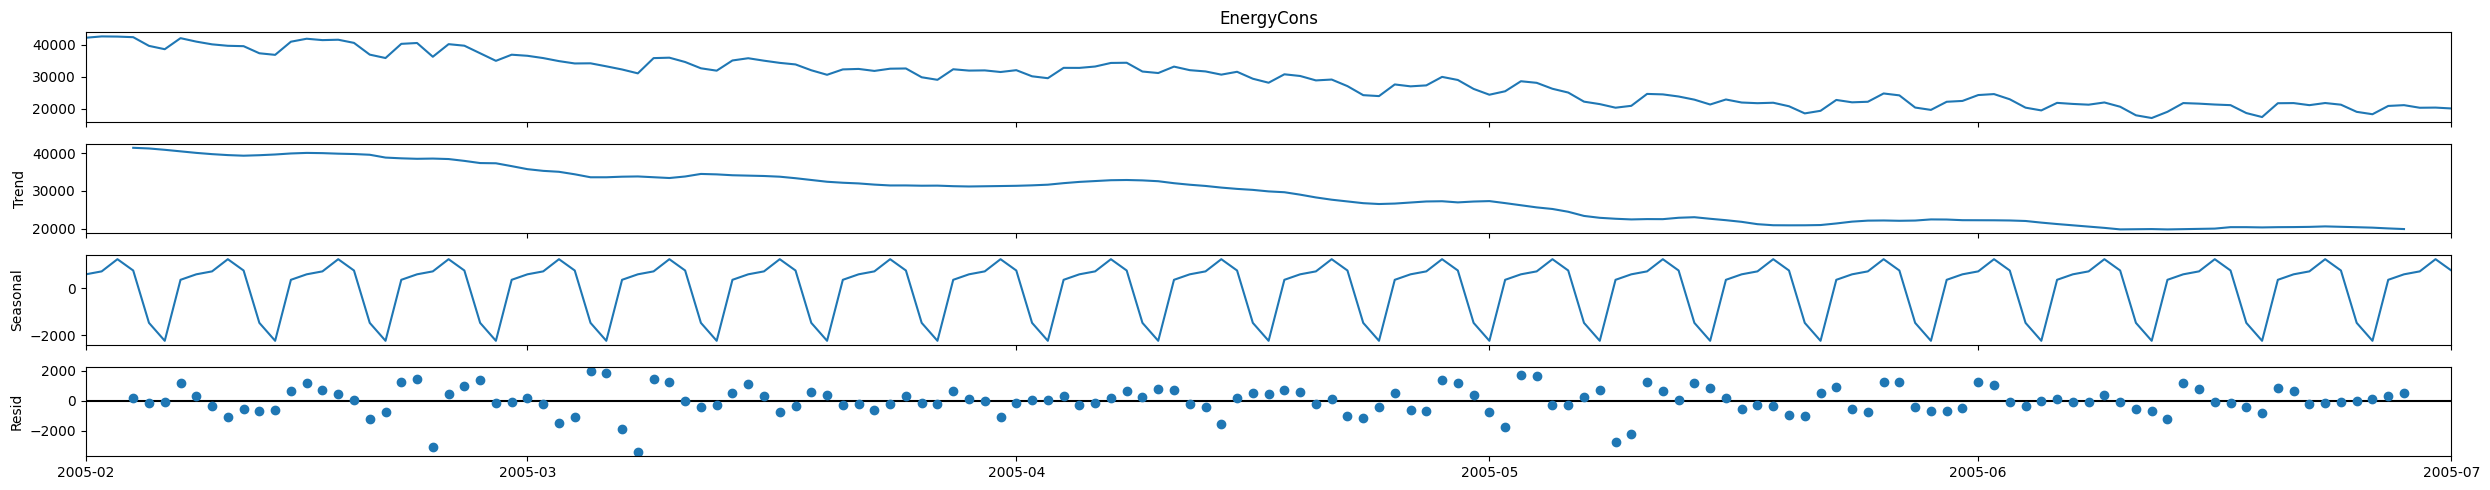

In [50]:
# automaticall calculate components
res = sm.tsa.seasonal_decompose(ech_df['EnergyCons']['2005-02-01 00:00':'2005-07-01 23:00'].resample("D").sum())
plt.rc("figure", figsize=(25,5))
resplot = res.plot()

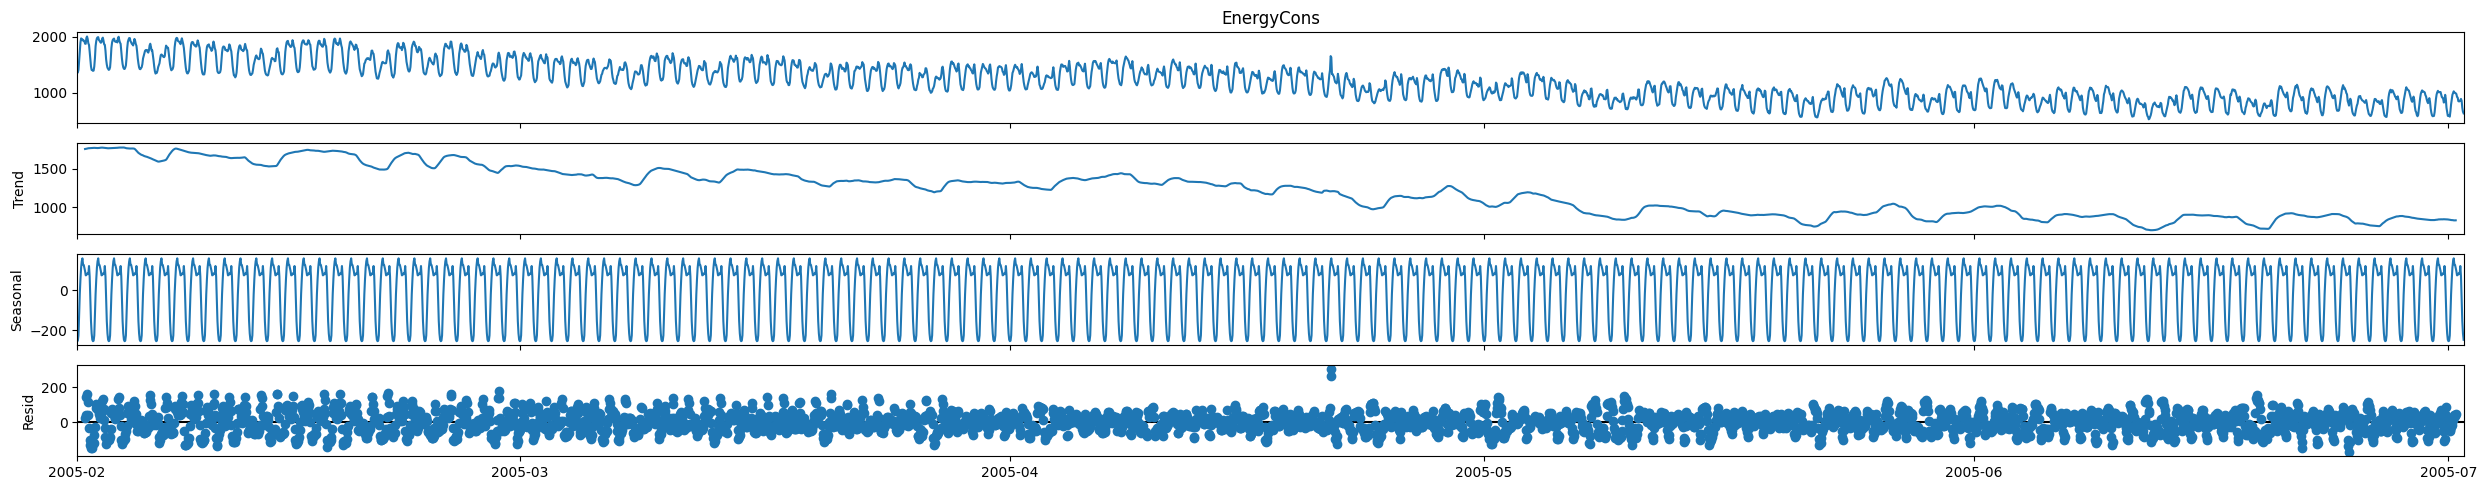

In [51]:

res = sm.tsa.seasonal_decompose(ech_df['EnergyCons']['2005-02-01 00:00':'2005-07-01 23:00'].resample("H").sum())
plt.rc("figure", figsize=(25,5))
resplot = res.plot()

# Simple ts Forecasting Approaches

## Naive Forecast <img src="https://c.tenor.com/oOR0BmNDPRAAAAAM/we-were-so-naive-brad-arnold.gif" alt="Drawing" style="width: 300px;"/>

In [ ]:
ech_df['EnergyCons'].tail(14)

Date
2007-12-31 10:00:00    1692
2007-12-31 11:00:00    1669
2007-12-31 12:00:00    1688
2007-12-31 13:00:00    1817
2007-12-31 14:00:00    1976
2007-12-31 15:00:00    1968
2007-12-31 16:00:00    1914
2007-12-31 17:00:00    1859
2007-12-31 18:00:00    1830
2007-12-31 19:00:00    1719
2007-12-31 20:00:00    1621
2007-12-31 21:00:00    1516
2007-12-31 22:00:00    1459
2007-12-31 23:00:00    1406
Name: EnergyCons, dtype: int64

In [ ]:
# shift within time series
ech_df['EnergyCons'].shift(7).tail(7)

Date
2007-12-31 17:00:00    1692.0
2007-12-31 18:00:00    1669.0
2007-12-31 19:00:00    1688.0
2007-12-31 20:00:00    1817.0
2007-12-31 21:00:00    1976.0
2007-12-31 22:00:00    1968.0
2007-12-31 23:00:00    1914.0
Name: EnergyCons, dtype: float64

In [ ]:
# one of possible naive forecasting algorithms
def naive_forecast(x, h):
  return x.shift(h)

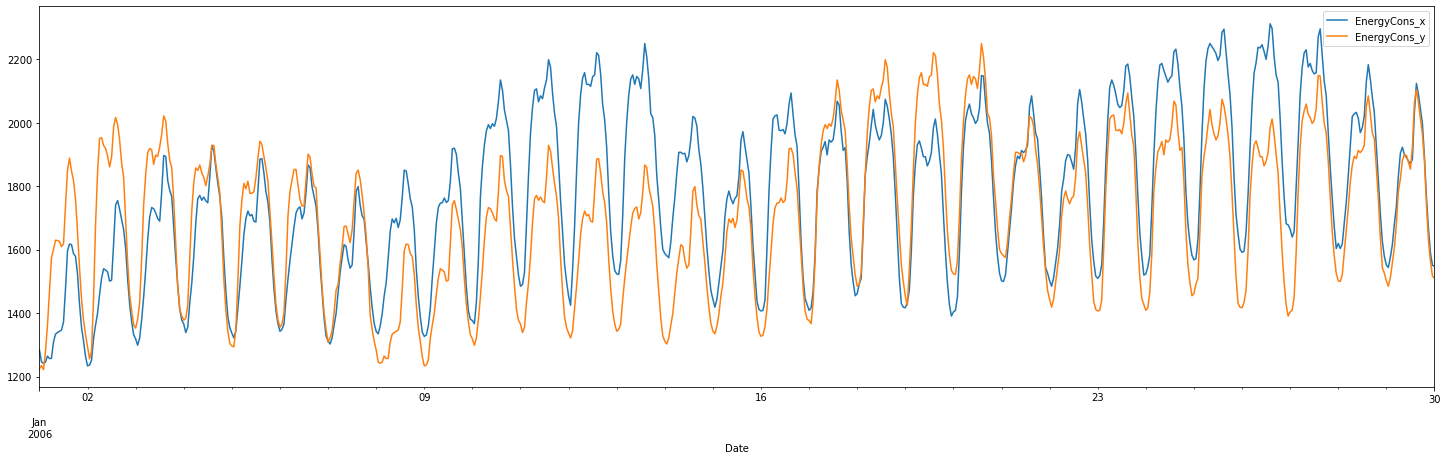

In [ ]:
ech_df[['EnergyCons']].merge(naive_forecast(x=ech_df[['EnergyCons']], h = 168), how='left', left_index = True, right_index = True )['2006-01-01 00:00:00':'2006-01-30 00:00:00'].plot(figsize=(25,7))

## Simple autoregression
$$y_{t+1} = w_1\cdot y_t+ \dots+w_K\cdot y_{t+1-K}=\sum_{i=1}^K w_i\cdot y_{t+1-i}$$

In [ ]:
# hankel matrix https://en.wikipedia.org/wiki/Hankel_matrix
sc.linalg.hankel([1,2,3,4, 5, 6, 7, 8], [8,9,10,11,12])

array([[ 1,  2,  3,  4,  5],
       [ 2,  3,  4,  5,  6],
       [ 3,  4,  5,  6,  7],
       [ 4,  5,  6,  7,  8],
       [ 5,  6,  7,  8,  9],
       [ 6,  7,  8,  9, 10],
       [ 7,  8,  9, 10, 11],
       [ 8,  9, 10, 11, 12]])

**How does autoregression matrix look like?**

$$
\begin{pmatrix}
    y_1 & \dots & y_K \\
        \dots & \dots & \dots    \\
    y_{T-K} & \dots & y_{T-1}
\end{pmatrix} \cdot  
\begin{pmatrix}
    w_K \\
    \vdots    \\
    w_1
\end{pmatrix} =
 \begin{pmatrix}
    y_{K+1} \\
    \vdots    \\
    y_{T}
\end{pmatrix}$$

**Case when delay is $h$**
$$y_{t+h} = w_1\cdot y_t+ \dots+w_K\cdot y_{t+1-K}=\sum_{i=1}^K w_i\cdot y_{t+1-i}$$

**Autoregression matrix**

$$
\begin{pmatrix}
    y_1 & \dots & y_K \\
        \dots & \dots & \dots    \\
    y_{T-h-K+1} & \dots & y_{T-h}
\end{pmatrix} \cdot  
\begin{pmatrix}
    w_K \\
    \vdots    \\
    w_1
\end{pmatrix} =
 \begin{pmatrix}
    y_{K+h} \\
    \vdots    \\
    y_{T}
\end{pmatrix}$$

In [ ]:
def get_autoregrmatrix(x,h,K):
    T = len(x)
    X = sc.linalg.hankel(x[:T-h-K+1],
                          np.hstack((x[T-h-K:T-h]))) # is needed to repeat x[-K] in second part
    y = x[K+h-1:]
    return X,y
# Train, answer = get_autoregrmatrix(x,h=1,K=10)

### Forecast for the next hour (delay=1)
> Indented block



In [ ]:
K=168
h = 1 # delay

x_train = ech_df['EnergyCons']['2005-01-01 00:00:00':'2006-01-01 00:00:00']
x_test =  ech_df['EnergyCons']['2006-01-01 00:00:00':'2006-01-30 00:00:00']

X_train, y_train = get_autoregrmatrix(x_train,h,K)
X_test, y_test = get_autoregrmatrix(x_test,h,K)

In [ ]:
print( X_train.shape)
print( y_train.shape)

(8593, 168)
(8593,)


In [ ]:
# Autoregression Matrix (rows - Samples, Columns = Regressors)
X_train

array([[1290, 1266, 1273, ..., 1377, 1302, 1256],
       [1266, 1273, 1280, ..., 1302, 1256, 1257],
       [1273, 1280, 1293, ..., 1256, 1257, 1267],
       ...,
       [1332, 1293, 1225, ..., 1645, 1541, 1394],
       [1293, 1225, 1235, ..., 1541, 1394, 1349],
       [1225, 1235, 1222, ..., 1394, 1349, 1312]])

In [ ]:
# Target Vector
y_train

Date
2005-01-08 00:00:00    1257
2005-01-08 01:00:00    1267
2005-01-08 02:00:00    1274
2005-01-08 03:00:00    1339
2005-01-08 04:00:00    1376
                       ... 
2005-12-31 20:00:00    1541
2005-12-31 21:00:00    1394
2005-12-31 22:00:00    1349
2005-12-31 23:00:00    1312
2006-01-01 00:00:00    1284
Name: EnergyCons, Length: 8593, dtype: int64

Train score: 0.997, Test score: 0.991


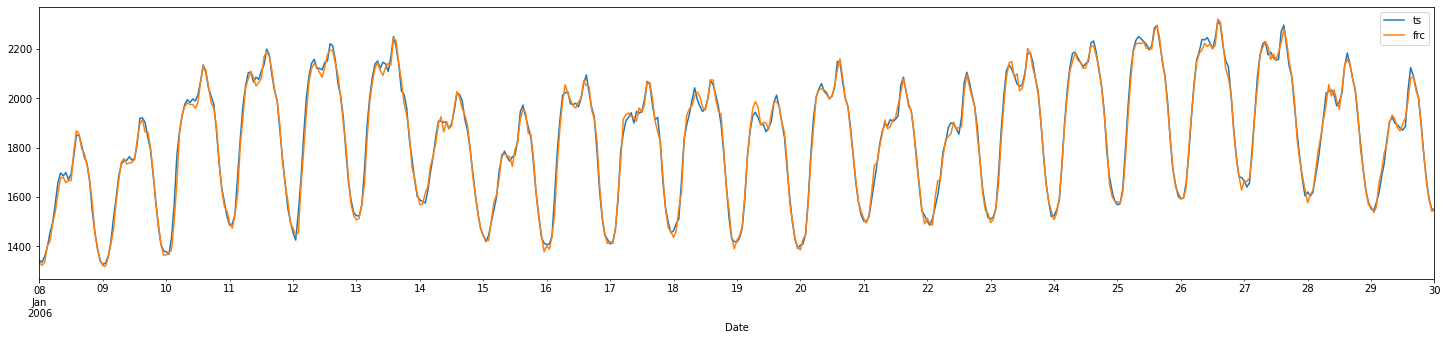

In [ ]:
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)
print('Train score: %.3f, Test score: %.3f'% (linear_regression.score(X_train, y_train), linear_regression.score(X_test, y_test)))
pd.DataFrame({'ts':y_test, 'frc': linear_regression.predict(X_test)}).plot(figsize = (25,5))

### Try another delay: h=168

Train score: 0.933, Test score: 0.651


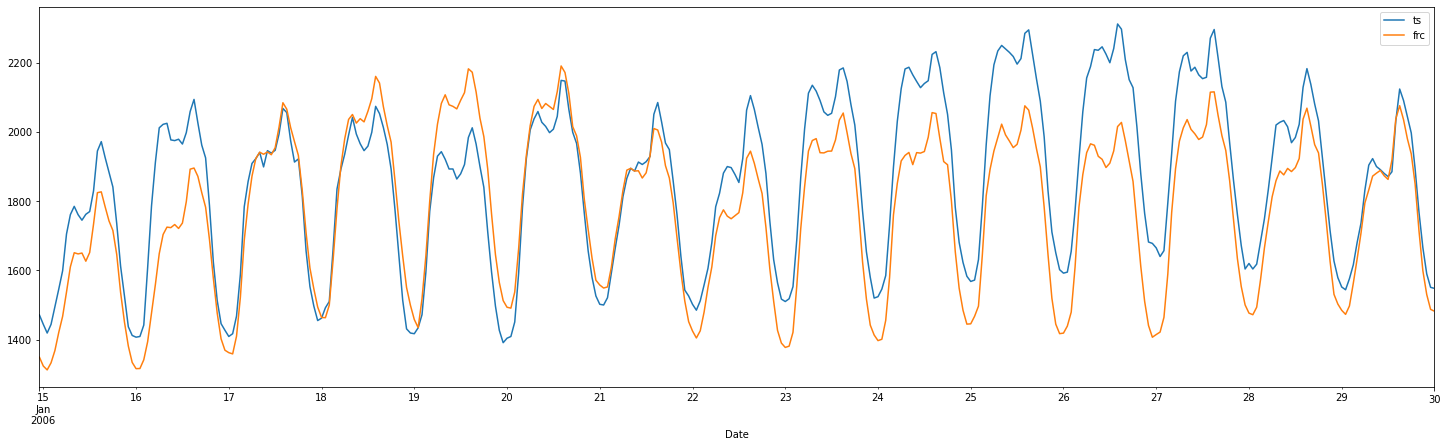

In [ ]:
K=168
h = 168 # delay

x_train = ech_df['EnergyCons']['2005-01-01 00:00:00':'2006-01-01 00:00:00']
x_test = ech_df['EnergyCons']['2006-01-01 00:00:00':'2006-01-30 00:00:00']

X_train, y_train = get_autoregrmatrix(x_train,h,K)
X_test, y_test = get_autoregrmatrix(x_test,h,K)
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)
print('Train score: %.3f, Test score: %.3f'% (linear_regression.score(X_train, y_train), linear_regression.score(X_test, y_test)))
pd.DataFrame({'ts':y_test, 'frc': linear_regression.predict(X_test)}).plot(figsize=(25,7))

# Selfcheck questions
  **1. What is a time series?**
            
  **2. What is a delay and a horizon of time series forecast?**
   
  **3. Remember at least 3 features in the data that can be observed in the retail time series.**
         
  **4.  Remember at least 3 features in the data that can be observed in the finance time series.** **
            
  **5.  Remember at least 3 features in the data that can be observed in the energy consumption time series.**
          
  **6. What is the differenve between forecast horizon and forecast delay?**
  
  **7. What is naive forecasting approach?**

  **8. What is a hankel matrix?**
          

# Practical Task (optional)
Draw dependence of the cross_validation score (linear_regression.score) on the horizon of the forecast for LR model in the case of energy consumption forecasting problem. You should write down code to show dependence for $h=1,2,\dots, 720$. You can choose amount of regressors of LR in experiment as much as you want.   

In [ ]:
# put your code here


# Materials
- [Лукашин Ю.П. Адаптивные методы краткосрочного прогнозирования временных рядов. Финансы и статистика. 2003, главы 1,4,5,7.](https://disk.yandex.ru/i/Coy9qlKIw14MeA)
- [Магнус Я.Р., Катышев П.К., Пересецкий А.А. Эконометрика. Начальный курс., глава 11](https://disk.yandex.ru/i/s4UN5oNc4_56Xg)
- [Rob J Hyndman, Forecasting: Principles & Practice, 23-25 September 2014
](https://robjhyndman.com/uwafiles/fpp-notes.pdf)
- [James D Hamilton, Time Series Analysis, 1994](
http://www.ru.ac.bd/stat/wp-content/uploads/sites/25/2019/03/504_02_Hamilton_Time-Series-Analysis.pdf)

